<h4>Understanding the co-relation between keyword rankings with description or any other attribute.</h4>


In [106]:
import pandas as pd  #importing pandas for loading dataset and manipulating data for analysis


In [107]:
df=pd.read_csv('browser_rankings_data.csv',header=1)   #reading csv file

In [108]:
df.head()  #Going through top 5 rows for understanding the dataset

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,browser,2.0,in,en,2020-12-16,net.fast.web.browser,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
1,2,browser,3.0,in,en,2020-12-16,com.android.chrome,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."
2,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2021-02-27,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest..."
3,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
4,4,browser,1.0,in,en,2020-12-16,com.cloudmosa.puffinTV,2021-02-07,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...


In [109]:
len(df)  #number of rows

3066

In [110]:
df.columns  #listing down all columns in the dataframe

Index(['ID', 'Keyword', 'Rank', 'Country', 'Language', 'Date', 'App ID',
       'Date of Last Description Change', 'Short Description',
       'Long Description'],
      dtype='object')

In [111]:
df.Keyword.unique()     #understand types of keywords

array(['browser', 'android browser', 'privacy browser',
       'privacy browsers for android', 'best privacy browsers',
       'fast browser', 'ad free browser'], dtype=object)

In [12]:
df.info()      #finding if any column has missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               3066 non-null   int64  
 1   Keyword                          3066 non-null   object 
 2   Rank                             3050 non-null   float64
 3   Country                          3066 non-null   object 
 4   Language                         3066 non-null   object 
 5   Date                             3066 non-null   object 
 6   App ID                           3066 non-null   object 
 7   Date of Last Description Change  3066 non-null   object 
 8   Short Description                3066 non-null   object 
 9   Long Description                 3066 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 239.7+ KB


In [112]:
#seems like there are few null values in Rank column
df.Rank.isna().value_counts()

False    3050
True       16
Name: Rank, dtype: int64

In [113]:
#there are 16 rows which dosen't have rank ,we can drop them
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3050 entries, 0 to 3065
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               3050 non-null   int64  
 1   Keyword                          3050 non-null   object 
 2   Rank                             3050 non-null   float64
 3   Country                          3050 non-null   object 
 4   Language                         3050 non-null   object 
 5   Date                             3050 non-null   object 
 6   App ID                           3050 non-null   object 
 7   Date of Last Description Change  3050 non-null   object 
 8   Short Description                3050 non-null   object 
 9   Long Description                 3050 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 262.1+ KB


In [114]:
df.Rank.describe()  #understanding range of ranks

count    3050.000000
mean       15.155738
std        24.268403
min         1.000000
25%         2.000000
50%         5.000000
75%        16.000000
max       134.000000
Name: Rank, dtype: float64

In [115]:
df_key=df.groupby('Keyword')   #grouping data by Keyword

In [117]:
df_key.first()   #getting first row from each group

,ID,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
Keyword,,,,,,,,,
ad free browser,217,3.0,in,en,2020-12-18,com.brave.browser,2020-12-18,"Free, safe internet browser! Private browsing,...","Privately browse the internet, for free! The B..."
android browser,5,11.0,in,en,2020-12-16,net.fast.web.browser,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
best privacy browsers,209,2.0,in,en,2020-12-18,com.brave.browser,2020-12-18,"Free, safe internet browser! Private browsing,...","Privately browse the internet, for free! The B..."
browser,1,2.0,in,en,2020-12-16,net.fast.web.browser,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
fast browser,213,6.0,in,en,2020-12-18,com.brave.browser,2020-12-18,"Free, safe internet browser! Private browsing,...","Privately browse the internet, for free! The B..."
privacy browser,201,3.0,in,en,2020-12-18,com.brave.browser,2020-12-18,"Free, safe internet browser! Private browsing,...","Privately browse the internet, for free! The B..."
privacy browsers for android,205,2.0,in,en,2020-12-18,com.brave.browser,2020-12-18,"Free, safe internet browser! Private browsing,...","Privately browse the internet, for free! The B..."


<h3>Finding and understanding co-relation between Keyword rankings and description</h3>

In [118]:
s_corr = df_key['Short Description'].get_group('browser').str.get_dummies(sep=',').corrwith(df.Rank/df.Rank.max())
print (s_corr.sort_values(ascending=False))

Fast                                                                  0.444426
 and secure. Google Chrome browser for Android phones and tablets.    0.324345
 simple                                                               0.324345
 Ad blocker                                                           0.249161
 QR-code reader &amp; personalized news                               0.249161
 safe web browser: free VPN                                           0.249161
 best mobile browser                                                 -0.139758
 fast search Google.                                                 -0.139758
 fastest                                                             -0.139758
 secure Web Browser                                                  -0.139758
The small                                                            -0.139758
Puffin TV Browser - One App to Watch All Videos on the Web           -0.195071
Puffin TV Browser - One App to Watch All Videos on t

<h3>Insights from above:</h3>

<h>
<li>When the keyword with <b>browsers</b> have Fast or secure in their description it tends to have a positive correlation
i.e rating increase when it has fast or secure word in description.</li>
<li>When the keyword with <b>browsers</b> have small or Puffin TV Browser in their description it tends to have a negative correlation
i.e rating decrease when it has small or Puffin TV Browser words in description.</li>
</h>

In [119]:
s_corr = df_key['Short Description'].get_group('ad free browser').str.get_dummies(sep=',').corrwith(df.Rank/df.Rank.max())
print (s_corr.sort_values(ascending=False))

 Fast &amp; data-saving browser.                  0.770290
 Football &amp; celebrity news                    0.770290
Funny video                                       0.770290
 dark &amp; private mode.                         0.142074
 sync                                             0.142074
Fast &amp; private web browser with ad blocker    0.142074
 safe internet browser! Private browsing         -0.352900
 search engine &amp; pop-up blocker.             -0.352900
Free                                             -0.352900
 and escape ad trackers.                         -0.456801
 search anonymously                              -0.456801
Browse the web privately                         -0.456801
dtype: float64


<h3>Insights from above:</h3>

<h>
<li>When the keyword with <b>ad free browser</b> have Fast,data-saving browser or Football and celebrity news or Funny in their description it tends to have a positive correlation
i.e rating increase when these words are present in the  description.</li>
<li>When the keyword with <b>ad free browser</b> have search anonymously or Browse the web privately  in their description it tends to have a negative correlation
i.e rating decrease when these words are in description.</li>
</h>

In [120]:
s_corr = df_key['Short Description'].get_group('android browser').str.get_dummies(sep=',').corrwith(df.Rank/df.Rank.max())
print (s_corr.sort_values(ascending=False))

 and secure. Google Chrome browser for Android phones and tablets.    0.592692
 simple                                                               0.592692
 best mobile browser                                                  0.341968
 fast search Google.                                                  0.341968
 fastest                                                              0.341968
 secure Web Browser                                                   0.341968
The small                                                             0.341968
Fast                                                                  0.151555
Puffin TV Browser - One App to Watch All Videos on the Web           -0.215313
Puffin TV Browser - One App to Watch All Videos on the Web.          -0.215313
 Ad blocker                                                          -0.283232
 QR-code reader &amp; personalized news                              -0.283232
 safe web browser: free VPN                         

<h3>Insights from above:</h3>

<h>
<li>When the keyword with <b>android browsers</b> have secure or simple in their description it tends to have a positive correlation
i.e rating increase when these words are present in the  description.</li>
<li>When the keyword with <b>android browsers</b> have Ad blocker or QR-code reader or  safe web browser: free VPN  in their description it tends to have a negative correlation
i.e rating decrease when these words are in description.</li>
</h>

In [121]:
s_corr = df_key['Short Description'].get_group('best privacy browsers').str.get_dummies(sep=',').corrwith(df.Rank/df.Rank.max())
print (s_corr.sort_values(ascending=False))

 dark &amp; private mode.                         0.902085
 sync                                             0.902085
Fast &amp; private web browser with ad blocker    0.902085
 Fast &amp; data-saving browser.                  0.007867
 Football &amp; celebrity news                    0.007867
Funny video                                       0.007867
 safe internet browser! Private browsing         -0.263610
 search engine &amp; pop-up blocker.             -0.263610
Free                                             -0.263610
 and escape ad trackers.                         -0.494827
 search anonymously                              -0.494827
Browse the web privately                         -0.494827
dtype: float64


<h3>Insights from above:</h3>

<h>
<li>When the keyword with <b>best privacy browsers</b> have dark and private mode or fast or private web browser with ad blocker  in their description it tends to have a positive correlation
i.e rating increase when these words are present in the  description.</li>
<li>When the keyword with <b>best privacy browsers</b> have search anonymously  or Browse the web privately  in their description it tends to have a negative correlation
i.e rating decrease when these words are in description.</li>
</h>

In [122]:
s_corr = df_key['Short Description'].get_group('fast browser').str.get_dummies(sep=',').corrwith(df.Rank/df.Rank.max())
print (s_corr.sort_values(ascending=False))

 dark &amp; private mode.                         0.929880
 sync                                             0.929880
Fast &amp; private web browser with ad blocker    0.929880
 and escape ad trackers.                         -0.133076
 search anonymously                              -0.133076
Browse the web privately                         -0.133076
 Fast &amp; data-saving browser.                 -0.345254
 Football &amp; celebrity news                   -0.345254
Funny video                                      -0.345254
 safe internet browser! Private browsing         -0.416993
 search engine &amp; pop-up blocker.             -0.416993
Free                                             -0.416993
dtype: float64


<h3>Insights from above:</h3>

<h>
<li>When the keyword with <b>fast browser</b> have dark and private mode or fast or private web browser with ad blocker  in their description it tends to have a positive correlation
i.e rating increase when these words are present in the  description.</li>
<li>When the keyword with <b>fast browser</b> have Funny video  or safe internet browser! Private browsing or Free in their description it tends to have a negative correlation
i.e rating decrease when these words are in description.</li>
</h>

In [123]:
s_corr = df_key['Short Description'].get_group('privacy browser').str.get_dummies(sep=',').corrwith(df.Rank/df.Rank.max())
print (s_corr.sort_values(ascending=False))

 dark &amp; private mode.                         0.924487
 sync                                             0.924487
Fast &amp; private web browser with ad blocker    0.924487
 Fast &amp; data-saving browser.                  0.018766
 Football &amp; celebrity news                    0.018766
Funny video                                       0.018766
 safe internet browser! Private browsing         -0.298301
 search engine &amp; pop-up blocker.             -0.298301
Free                                             -0.298301
 and escape ad trackers.                         -0.523049
 search anonymously                              -0.523049
Browse the web privately                         -0.523049
dtype: float64


<h3>Insights from above:</h3>

<h>
<li>When the keyword with <b>privacy browser</b> have dark and private mode or fast or private web browser with ad blocker  in their description it tends to have a positive correlation
i.e rating increase when these words are present in the  description.</li>
<li>When the keyword with <b>privacy browser</b> have search anonymously or Browse the web privately in their description it tends to have a negative correlation
i.e rating decrease when these words are in description.</li>
</h>

In [124]:
s_corr = df_key['Short Description'].get_group('privacy browsers for android').str.get_dummies(sep=',').corrwith(df.Rank/df.Rank.max())
print (s_corr.sort_values(ascending=False))

 dark &amp; private mode.                         0.911774
 sync                                             0.911774
Fast &amp; private web browser with ad blocker    0.911774
 Fast &amp; data-saving browser.                  0.020364
 Football &amp; celebrity news                    0.020364
Funny video                                       0.020364
 safe internet browser! Private browsing         -0.288450
 search engine &amp; pop-up blocker.             -0.288450
Free                                             -0.288450
 and escape ad trackers.                         -0.507585
 search anonymously                              -0.507585
Browse the web privately                         -0.507585
dtype: float64


<h3>Insights from above:</h3>

<h>
<li>When the keyword with <b>privacy browsers for android</b> have dark and private mode or fast or private web browser with ad blocker  in their description it tends to have a positive correlation
i.e rating increase when these words are present in the  description.</li>
<li>When the keyword with <b>privacy browsers for android</b> have search anonymously or Browse the web privately in their description it tends to have a negative correlation
i.e rating decrease when these words are in description.</li>
</h>

<h4>Question</h4>
<h5>Does APP ID (Also known as package name) play any role in ranking?  
</h5>

In [144]:
import seaborn as sns  #importing seaborn for visualization

In [126]:
df['App ID'].unique()    #understanding App ID column values

array(['net.fast.web.browser', 'com.android.chrome', 'com.opera.browser',
       'com.cloudmosa.puffinTV', 'com.brave.browser',
       'com.vivaldi.browser', 'com.duckduckgo.mobile.android',
       'com.transsion.phoenix'], dtype=object)

<h4>Getting co-relation between App ID's and Rank</h4>

In [151]:
s_corr = df['App ID'].str.get_dummies().corrwith(df.Rank/df.Rank.max())
print (s_corr.sort_values(ascending=False))

com.vivaldi.browser              0.775795
com.transsion.phoenix            0.165066
com.android.chrome              -0.051519
net.fast.web.browser            -0.083249
com.opera.browser               -0.141335
com.duckduckgo.mobile.android   -0.181225
com.brave.browser               -0.183369
com.cloudmosa.puffinTV          -0.233195
dtype: float64


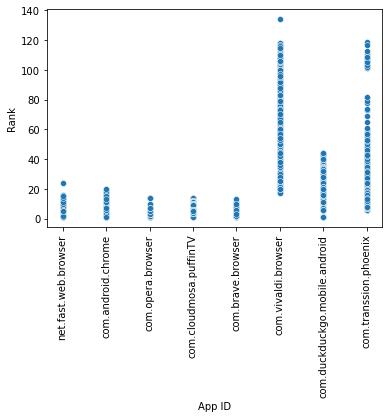

In [152]:
#understanding trend of App ID with Rank
sc=sns.scatterplot(x=df['App ID'],y=df['Rank'])
sc.tick_params(axis='x',labelrotation=90)

<h3>Insights from above:</h3>

<h>
<li>The App ID as <b>com.vivaldi.browser</b> tend to have best ratings</li>
<li>The App ID as <b>com.brave.browser and com.opera.browser</b> tend to have poor ratings</li>
</h>